In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('rm_data_cleaned.csv')

In [36]:
df.head()

,Property,Address,Description,Price,Date Posted,Seller,Image,price_val,luton_yn,essex_yn,braintree_yn,l_garden_yn,garden_yn,exten_yn,location_simp,description_simp
0,3 bedroom semi-detached house,"Kirkwood Road, Luton",A well presented THREE bedroom semi-detached F...,"£300,000",18/08/2020,"Zebra Properties, Houghton Regis",https://media.rightmove.co.uk:443/dir/crop/10:...,300000,1,0,0,0,1,0,luton,garden_features
1,3 bedroom semi-detached house,"Ashby Road, Witham, Essex",Looking for your next family home? Then this i...,"£300,000",19/08/2020,"Leaders Sales, Witham",https://media.rightmove.co.uk:443/dir/crop/10:...,300000,0,1,0,0,0,0,essex,na
2,3 bedroom semi-detached house,"Paynters Mead, Basildon",OPEN HOUSE SATURDAY 22ND AUGUST 11am to 12pm T...,"£300,000",19/08/2020,"Yopa, East Anglia",https://media.rightmove.co.uk:443/dir/crop/10:...,300000,0,0,0,0,1,0,basildon,garden_features
3,3 bedroom semi-detached house,"Vange Hill Drive, Basildon",Designed for convenience is this three bedroom...,"£300,000",09/03/2020,"haart, Basildon",https://media.rightmove.co.uk:443/dir/crop/10:...,300000,0,0,0,0,0,0,basildon,london_features
4,3 bedroom detached house,"Hockliffe Road, Leighton Buzzard, Bedfordshire",SQUARES THE ESTATE AGENT ARE PLEASED TO OFFER ...,"£300,000",23/05/2020,"Squares Estate Agents, Leighton Buzzard",https://media.rightmove.co.uk:443/dir/crop/10:...,300000,0,0,0,0,1,1,na,large_features


In [35]:
df.columns

Index(['Property', 'Address', 'Description', 'Price', 'Date Posted', 'Seller',
       'Image', 'price_val', 'luton_yn', 'essex_yn', 'braintree_yn',
       'l_garden_yn', 'garden_yn', 'exten_yn', 'location_simp',
       'description_simp'],
      dtype='object')

In [34]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [30]:
def location_simplifier(address):
    if 'luton' in address.lower():
        return 'luton'
    elif 'essex' in address.lower():
        return 'essex'
    elif 'basildon' in address.lower():
        return 'basildon'
    elif 'braintree' in address.lower():
        return 'essex'
    elif 'hitchin' in address.lower():
        return 'luton'
    elif 'chelmsford' in address.lower():
        return 'chelmsford'
    elif 'alesbury' in address.lower():
        return 'alesbury'
    elif 'bexleyheath' in address.lower():
        return 'bexleyheath'
    else:
        return 'na'
    
def h_features(description):
    if 'large' in description.lower():
        return 'large_features'
    elif 'garden' in description.lower():
        return 'garden_features'
    elif 'london' in description.lower():
        return 'london_features'
    elif 'spacious' in description.lower():
        return 'spacious_features'
    elif 'exten' in description.lower():
        return 'extension_features'
    else:
        return 'na'
    

In [11]:
df['location_simp'] = df['Address'].apply(location_simplifier)

In [12]:
# Understnad the main locations
df.location_simp.value_counts()

na             122
luton          104
essex           77
basildon         6
chelmsford       2
bexleyheath      2
Name: location_simp, dtype: int64

In [31]:
# Potential of properties
df['description_simp'] = df['Description'].apply(h_features)
df.description_simp.value_counts()

na                    135
garden_features        71
spacious_features      42
large_features         34
extension_features     19
london_features        12
Name: description_simp, dtype: int64

In [38]:
# House description length 
df['decs_len'] = df['Description'].apply(lambda x: len(x))
df['decs_len']

0      289
1      268
2      268
3      175
4      270
      ... 
308    251
309    147
310    170
311    103
312     58
Name: decs_len, Length: 313, dtype: int64

In [39]:
df.describe()

,price_val,luton_yn,essex_yn,braintree_yn,l_garden_yn,garden_yn,exten_yn,decs_len
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.00000,313.00000,313.000000
mean,282763.019169,0.329073,0.092652,0.172524,0.009585,0.28115,0.13738,249.402556
std,22045.907618,0.470629,0.290408,0.378440,0.097587,0.45028,0.34480,58.902714
min,75000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,32.000000
25%,275000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,200.000000
50%,290000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,280.000000
75%,300000.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.00000,296.000000
max,300000.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,300.000000


In [40]:
df.columns

Index(['Property', 'Address', 'Description', 'Price', 'Date Posted', 'Seller',
       'Image', 'price_val', 'luton_yn', 'essex_yn', 'braintree_yn',
       'l_garden_yn', 'garden_yn', 'exten_yn', 'location_simp',
       'description_simp', 'decs_len'],
      dtype='object')

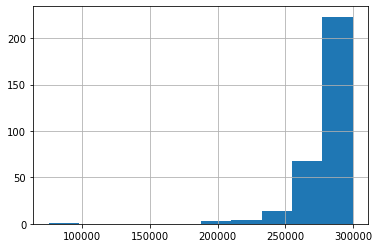

In [41]:
df.price_val.hist()

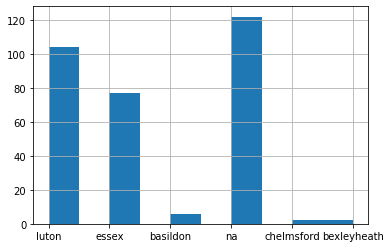

In [42]:
df.location_simp.hist()

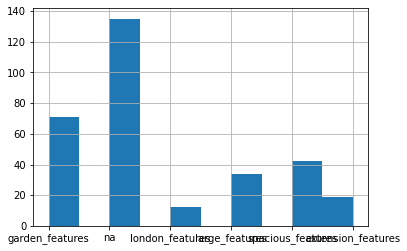

In [43]:
df.description_simp.hist()

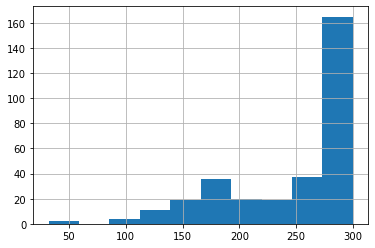

In [44]:
df.decs_len.hist()

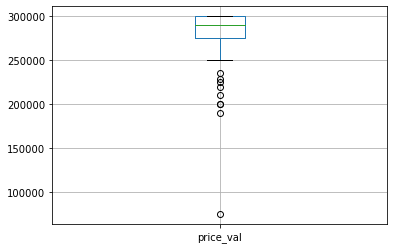

In [46]:
df.boxplot(column = ['price_val'])